<a href="https://colab.research.google.com/github/hanyuc37/Mushroom-Classfication-Model/blob/main/Mushroom_Classification_Model_Hanyu_Chen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
mushroom = pd.read_csv("mushrooms.csv")

In [ ]:
mushroom.head()
# predict class (edible or poison)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
mushroom.shape

(8124, 23)

In [ ]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Check if there is any missing value

In [ ]:
mushroom.isna().sum().sum()
# No missing value

0

# **EDA**

Mushroom's cap shape visualization

Definition of setting the count for each plot

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

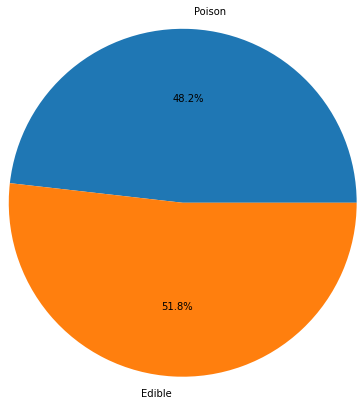

In [ ]:
# # of mushrooms each class
poison_count = len(mushroom[mushroom["class"] == "p"].index)
edible_count = len(mushroom[mushroom["class"] == "e"].index)

# Draw Pie Chart:
plt.pie([poison_count, edible_count], labels=["Poison", "Edible"], autopct='%1.1f%%', radius=2.0)
plt.show()

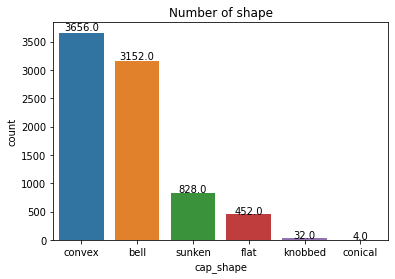

In [ ]:
#  # of cap_Shape 
cap_shape = []
for i in mushroom['cap-shape']:
  if i =='x':
    cap_shape.append("convex")
  elif i == 'b':
    cap_shape.append('bell')
  elif i == 's':
    cap_shape.append("sunken")
  elif i =='f':
    cap_shape.append('flat')
  elif i == 'k':
    cap_shape.append('knobbed')
  else:
    cap_shape.append('conical')
mushroom['cap_shape'] = cap_shape
g_2 = sns.barplot(x =mushroom['cap_shape'].unique(), y =  mushroom['cap_shape'].value_counts())
plt.title('Number of shape')
plt.xlabel('cap_shape')
plt.ylabel('count')
show_values(g_2)
plt.show()

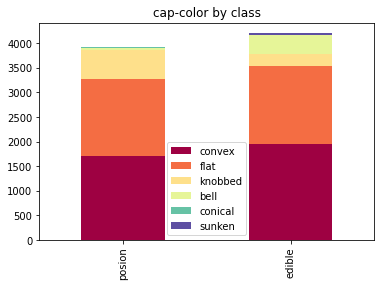

In [ ]:
# cap shape by class
posion = mushroom.loc[mushroom['class']=='p', :]['cap_shape'].value_counts()
edible     = mushroom.loc[mushroom['class']=='e', :]['cap_shape'].value_counts()
df_plot  = pd.DataFrame([posion,edible])
df_plot.index=['posion','edible']
# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='cap-color by class')

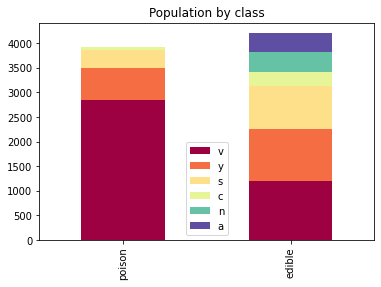

In [ ]:

posion = mushroom.loc[mushroom['class']=='p', :]['population'].value_counts()
edible     = mushroom.loc[mushroom['class']=='e', :]['population'].value_counts()
df_plot  = pd.DataFrame([posion,edible])
df_plot.index=['poison','edible']
# Bar plot
df_plot.plot(kind='bar',stacked=True, colormap='Spectral', title='Population by class')


odor by class

In [ ]:
mushroom['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [ ]:
mushroom.head(1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap_shape
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,convex


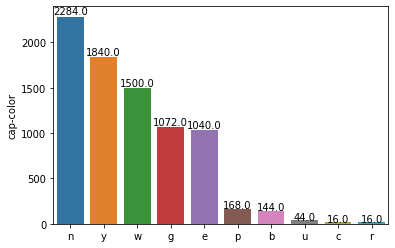

In [ ]:
g_3 = sns.barplot(data = mushroom,x = mushroom['cap-color'].unique(),y = mushroom['cap-color'].value_counts()) 
show_values(g_3)

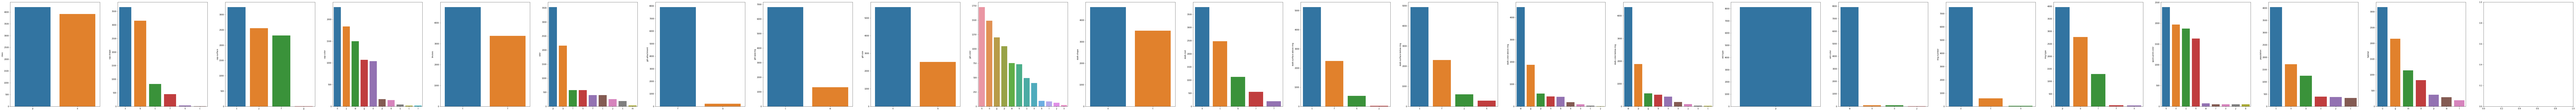

In [ ]:
fig, axes = plt.subplots(1, 24,figsize=(240,10))
counter = 0
for i in ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']:
       sns.barplot(ax = axes[counter],data = mushroom,x = mushroom[i].unique(),y = mushroom[i].value_counts())
       counter+=1

In [ ]:
mushroom['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

Pre-set the model including converts variables to dummy and split the dataset into train and test set (80%-20%)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
mushroom.drop('class', axis=1)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,cap_shape
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,convex
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,convex
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,bell
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,convex
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,convex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,knobbed
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,convex
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,flat
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,knobbed


In [ ]:
# Select Features
# get dummies
feature = pd.get_dummies(mushroom.drop('class', axis=1))
label = mushroom['class']
# train - test split
X_train, X_test, y_train, y_test = train_test_split(feature , label, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [ ]:
feature

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_m,habitat_p,habitat_u,habitat_w,cap_shape_bell,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_knobbed,cap_shape_sunken
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, random_state=100)
# Fitting a model and making predictions
forest = RandomForestClassifier()
model_rf = forest.fit(X_train,y_train)
prediction_rf = model_rf.predict (X_test)

In [ ]:
# Evaluate the model
from sklearn import metrics
print(metrics.accuracy_score(y_test, prediction_rf))

1.0


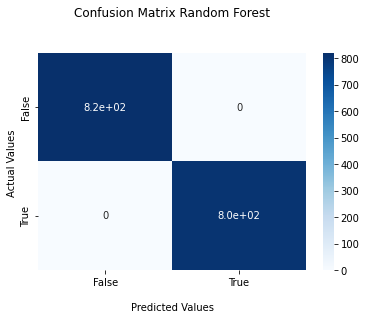

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction_rf)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

27    0.125860
35    0.078210
24    0.075088
36    0.063246
96    0.042465
57    0.041667
20    0.036456
61    0.031940
37    0.028425
58    0.027280
dtype: float64


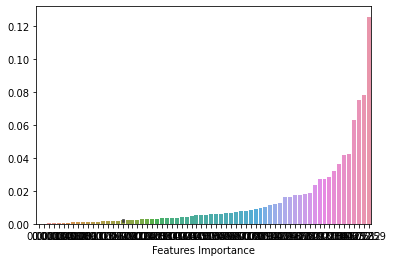

In [ ]:
featureImportances = pd.Series(forest.feature_importances_).sort_values(ascending=False)
print(featureImportances.head(10))

sns.barplot(x=round(featureImportances,4), y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

Text(0.5, 0, 'Feature Importance')

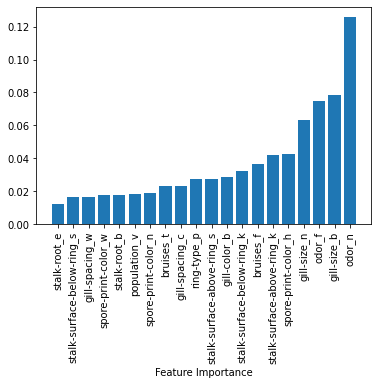

In [ ]:
sort = forest.feature_importances_.argsort()[-20:]
plt.bar(X_train.columns[sort], forest.feature_importances_[sort])
plt.xticks(rotation = 90)
plt.xlabel("Feature Importance")

Logistics Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
logistic = LogisticRegression()
model_log = logistic.fit (X_train, y_train)
prediction_log = model_log.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, prediction_log))

0.9981538461538462


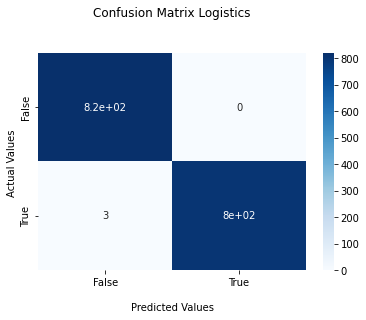

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction_log)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Logistics\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model_nb = nb.fit(X_train, y_train)
prediction_nb = model_nb.predict (X_test)

In [ ]:
print(metrics.accuracy_score(y_test, prediction_nb))

0.9606153846153846


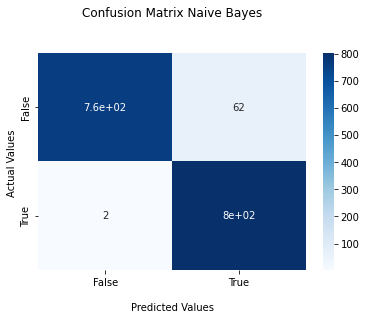

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction_nb)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5 )
model_knn = knn.fit(X_train, y_train)
prediction_knn = model_knn.predict (X_test)

In [ ]:
print(metrics.accuracy_score(y_test, prediction_knn))

1.0


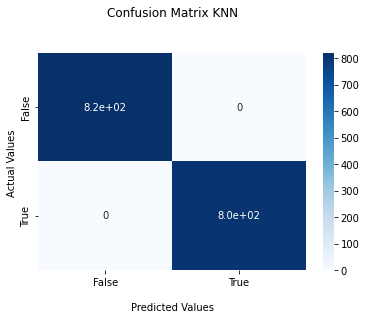

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction_knn)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix KNN\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 10, random_state = 100,
                            max_features = None, min_samples_leaf = 20)
dt.fit(X_train, y_train)
prediction_dt = dt.predict (X_test)

In [ ]:
print(metrics.accuracy_score(y_test, prediction_dt))

0.9956923076923077


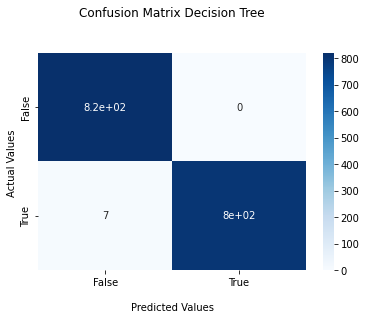

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction_dt)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()